In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [14]:
weather=pd.read_csv('Weather_data.csv')

In [15]:
weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [16]:
weather.shape

(98913, 20)

In [17]:
# Let's see the amount of the data missing.
print((weather.isnull().sum()/98913)*100)


datetime_utc      0.000000
 _conds           0.068747
 _dewptm          0.625802
 _fog             0.000000
 _hail            0.000000
 _heatindexm     70.569086
 _hum             0.761275
 _precipm       100.000000
 _pressurem       0.233539
 _rain            0.000000
 _snow            0.000000
 _tempm           0.676352
 _thunder         0.000000
 _tornado         0.000000
 _vism            4.464529
 _wdird          14.538028
 _wdire          14.538028
 _wgustm         98.925318
 _windchillm     99.420703
 _wspdm           2.378858
dtype: float64


In [18]:
#renaming columns for easy implementations
weather.columns = weather.columns.str.replace(' ', '')
weather.columns=weather.columns.str.replace('_','')

# I have decided to drop the columns with very high percentage of missing data as they don't contain information which will help our model learn, and applying imputation on these would just dilute the data and compromise the integrity.

In [19]:
drop=['heatindexm','precipm','wgustm','windchillm']
for m in drop:
    weather.drop(m,axis=1,inplace=True)

In [20]:
weather.dtypes

datetimeutc     object
conds           object
dewptm         float64
fog              int64
hail             int64
hum            float64
pressurem      float64
rain             int64
snow             int64
tempm          float64
thunder          int64
tornado          int64
vism           float64
wdird          float64
wdire           object
wspdm          float64
dtype: object

In [21]:
weather.head()

,datetimeutc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


In [22]:
#'datetimeutc', contains datetime info but it is in str format so I have converted it into datetime object, which will allow us to extract all the info from it.
weather['datetimeutc']=pd.to_datetime(weather['datetimeutc'])

In [23]:
weather.head()

,datetimeutc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


# saperating the year, month, day, time and adding them into their own saperate columns

In [24]:
weather['month'] = pd.DatetimeIndex(weather['datetimeutc']).month

In [25]:
weather['year']=pd.DatetimeIndex(weather['datetimeutc']).year

In [26]:
weather['day']=pd.DatetimeIndex(weather['datetimeutc']).day

In [27]:
weather['time']=pd.DatetimeIndex(weather['datetimeutc']).hour

In [28]:
weather.drop('datetimeutc',axis=1,inplace=True)

In [29]:
#importing simple imputer

In [30]:
from sklearn.impute import SimpleImputer

# using simple imputer on conds, wdire because they are discrete and not continous. 

In [31]:
ss=SimpleImputer(strategy='most_frequent')

In [32]:
weather['conds']=ss.fit_transform(weather['conds'].values.reshape(-1,1))

In [33]:
weather['wdire']=ss.fit_transform(weather['wdire'].values.reshape(-1,1))

# using mean on 'dewptm','hum','pressurem','tempm','vism','wdird','wspdm' because they contain continous type of data.

In [34]:
sm=SimpleImputer(strategy='mean')

In [35]:
imputed_mean=['dewptm','hum','pressurem','tempm','vism','wdird','wspdm']

In [36]:
for m in imputed_mean:
    weather[m]=sm.fit_transform(weather[m].values.reshape(-1,1))

In [37]:
# using the labelEncoder to encode the discrete classes with labels.

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
weather['wdire']=le.fit_transform(weather['wdire'].values.reshape(-1,1))
weather['conds']=le.fit_transform(weather['conds'])

C:\Users\utkarsh\Anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
weather.corr()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,month,year,day,time
conds,1.000000,-0.291307,0.029340,0.015392,0.023458,-0.002724,0.063362,0.002872,-0.261749,0.114966,-0.004128,-0.021088,-0.073544,0.009018,-0.072936,0.142977,-0.088930,-0.007938,-0.018066
dewptm,-0.291307,1.000000,-0.216728,0.003413,0.322166,-0.003951,0.143545,0.004127,0.525807,0.067993,-0.000202,0.009721,-0.144871,-0.224539,-0.006457,0.203772,0.145305,0.013128,0.015232
fog,0.029340,-0.216728,1.000000,-0.003075,0.369481,-0.000867,-0.044250,-0.000853,-0.445818,-0.026073,-0.001206,-0.020357,-0.083687,0.022321,-0.096274,-0.076696,-0.002366,0.002820,-0.028317
hail,0.015392,0.003413,-0.003075,1.000000,0.007675,-0.000034,-0.001892,-0.000036,-0.003086,0.108780,-0.000052,-0.000484,0.004944,-0.000806,0.003035,-0.008181,0.011025,-0.001421,-0.000079
hum,0.023458,0.322166,0.369481,0.007675,1.000000,-0.005773,0.172794,0.004464,-0.584223,0.072725,-0.000907,-0.023796,-0.311181,-0.166965,-0.218106,0.085226,-0.008232,0.011936,0.090484
pressurem,-0.002724,-0.003951,-0.000867,-0.000034,-0.005773,1.000000,-0.000538,-0.000009,0.004693,-0.000332,-0.000013,0.000167,0.004604,-0.001402,-0.000153,-0.001504,-0.003011,-0.003491,0.001365
rain,0.063362,0.143545,-0.044250,-0.001892,0.172794,-0.000538,1.000000,-0.000525,-0.008074,0.416014,-0.000742,-0.004107,-0.020026,-0.051101,0.034303,0.004506,0.030418,-0.008516,-0.021363
snow,0.002872,0.004127,-0.000853,-0.000036,0.004464,-0.000009,-0.000525,1.000000,0.000159,-0.000309,-0.000014,-0.000065,0.002506,0.004611,0.000433,-0.001487,0.005283,0.003008,0.001866
tempm,-0.261749,0.525807,-0.445818,-0.003086,-0.584223,0.004693,-0.008074,0.000159,1.000000,0.001040,0.001291,0.031348,0.149412,-0.028772,0.213702,0.071987,0.047558,0.001249,-0.065091
thunder,0.114966,0.067993,-0.026073,0.108780,0.072725,-0.000332,0.416014,-0.000309,0.001040,1.000000,-0.000437,-0.002517,0.000967,-0.019337,0.042004,-0.011724,0.016467,-0.000355,0.013720


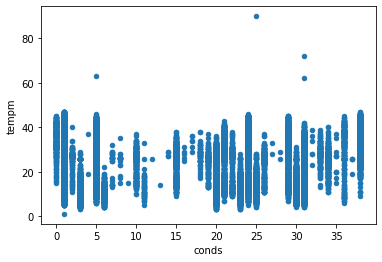

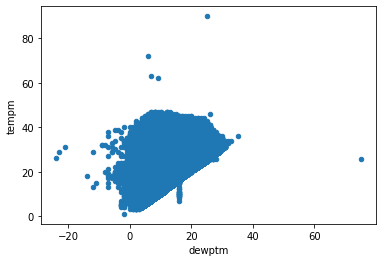

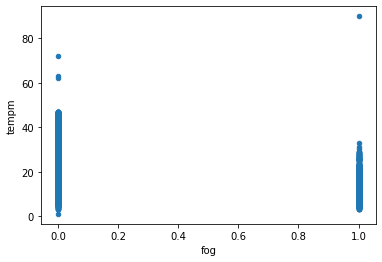

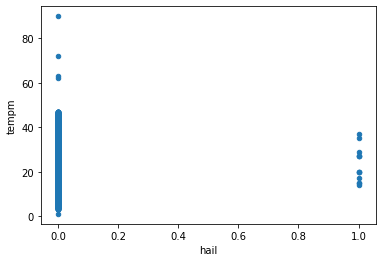

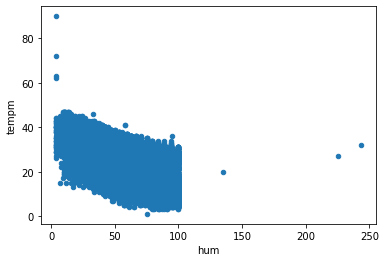

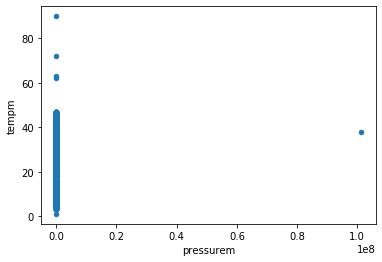

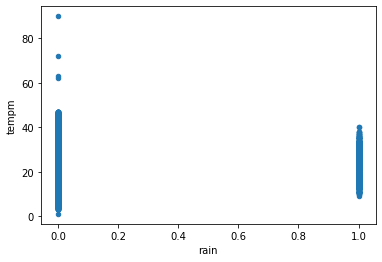

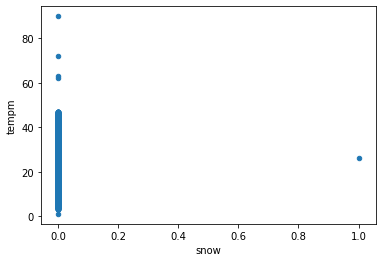

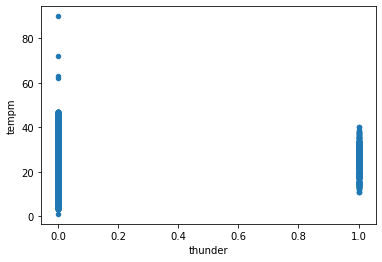

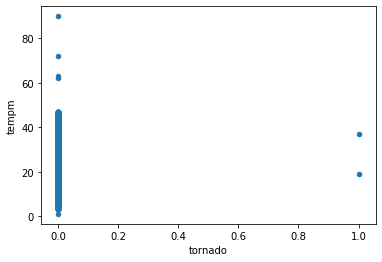

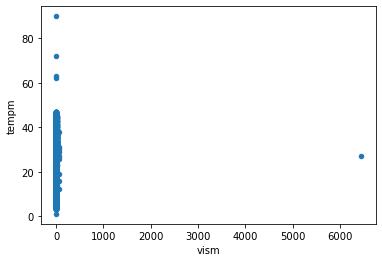

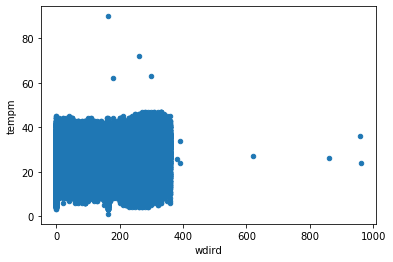

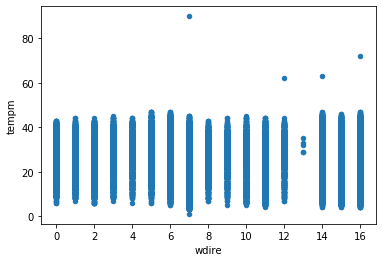

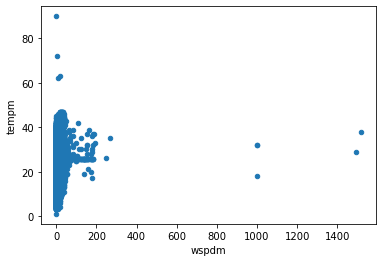

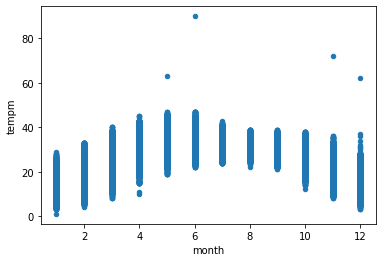

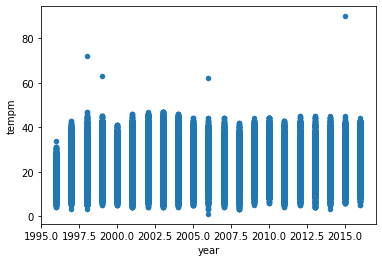

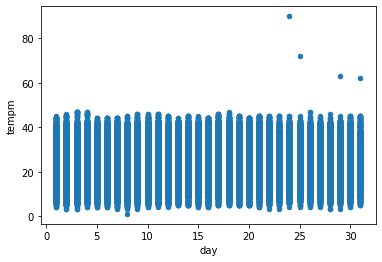

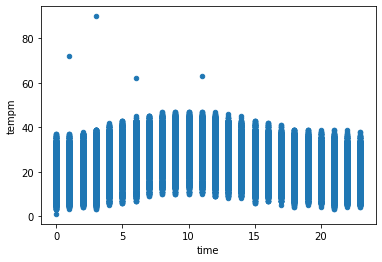

In [41]:
weather_col=['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm',
       'month', 'year', 'day','time']
for x in weather_col:
    weather.plot.scatter(x,'tempm')

# from the correlation table and graphs above we can observe the following.
# 1).Temp variable shows negative correlation with 'conds','fog','hum'
# 2).Positive relation with 'dewptm','wdird','wspdm'
# 3).Month and tempm graph show a trend where we can see the that temp is higher during mid year, could be suggesting that the dataset mostly comprises of areas around the tropic.
# 4).Year variable is mostly not showing much of an effect upon tempm.
# 5).Time shows from 6am to 4pm the tempm is higher which is expected. 

In [42]:
# encoding rest of the categorical data with labels.

In [43]:
encode=['day','month']
for m in encode:
    weather[m]=le.fit_transform(weather[m].values.reshape(-1,1))

In [44]:
#converting all the data to integer type.
for x in weather.columns:
    weather[x]=weather[x].astype(int)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [51]:
x=weather.drop('tempm',axis=1)

In [52]:
y=weather.iloc[:,-11].values.reshape(-1,1)

# using standard scaler on the columns below, because algorithms work best whwn the data is scaled equally. 

In [53]:
standard_columns=['dewptm', 'fog', 'hail', 'hum', 'pressurem','rain', 'snow', 'thunder', 'tornado', 'vism', 'wdird','wspdm','year']

In [54]:
scaler=StandardScaler()
for m in standard_columns:
    x[m]=scaler.fit_transform(x[m].values.reshape(-1,1))

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [56]:
lr,rfr,dtr=LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()

In [57]:
xgr=xgboost.sklearn.XGBRegressor(max_depth=9,n_estimators=200,min_child_weight=5,reg_alpha=0.3)

# Linear Regression

In [58]:
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)


0.9209473041328424

In [59]:
pred_lr=lr.predict(xtest)
r2=r2_score(pred_lr,ytest)
mse=mean_squared_error(pred_lr,ytest)
print('r2 score is',r2)
print('mse is', mse)
print('rmse is',np.sqrt(mse))
cv=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('cross validation score is',cv.mean())
print('standard deviation of cross validation score is',cv.std())

r2 score is 0.9116217129587775
mse is 5.815036669509833
rmse is 2.4114387136126503
cross validation score is 0.34626660949091426
standard deviation of cross validation score is 1.6414109663616445


# random forest regressor

In [60]:
rfr.fit(xtrain,ytrain)
rfr.score(xtrain,ytrain)

0.999245375712557

In [61]:
pred_rfr=rfr.predict(xtest)
r2=r2_score(pred_rfr,ytest)
mse_rfr=mean_squared_error(pred_rfr,ytest)
print('r2 score is',r2)
print('mse is', mse_rfr)
print('rmse is',np.sqrt(mse_rfr))
cv_rfr=cross_val_score(rfr,x,y,cv=10,scoring='r2',n_jobs=-1)
print('cross validation score is',cv_rfr.mean())
print('standard deviation of cross validation score is',cv_rfr.std())

r2 score is 0.9925648590657632
mse is 0.5266531400380121
rmse is 0.7257087156966024
cross validation score is 0.9801792362911741
standard deviation of cross validation score is 0.02073044106393575


# Decision Tree Regressor

In [62]:
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)

1.0

In [65]:
pred_dtr=dtr.predict(xtest)
r2_dtr=r2_score(pred_rfr,ytest)
mse_dtr=mean_squared_error(pred_dtr,ytest)
print('r2 score is',r2_dtr)
print('mse is', mse_dtr)
print('rmse is',np.sqrt(mse_dtr))
cv_dtr=cross_val_score(dtr,x,y,cv=10,scoring='r2',n_jobs=-1)
print('cross validation score is',cv_dtr.mean())
print('standard deviation of cross validation score is',cv_dtr.std())

r2 score is 0.9925648590657632
mse is 0.9301629665574831
rmse is 0.9644495666220619
cross validation score is 0.968412194747966
standard deviation of cross validation score is 0.026899683534188288


# XgBoost 

In [64]:
xgr.fit(xtrain,ytrain)
xgr.score(xtrain,ytrain)

[14:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9985907276729956

In [66]:
pred_xgr=xgr.predict(xtest)
r2_xgr=r2_score(pred_xgr,ytest)
mse_xgr=mean_squared_error(pred_xgr,ytest)
print('r2 score is',r2_xgr)
print('mse is', mse_xgr)
print('rmse is',np.sqrt(mse_xgr))
cv_xgr=cross_val_score(xgr,x,y,cv=10,scoring='r2',n_jobs=-1)
print('cross validation score is',cv_xgr.mean())
print('standard deviation of cross validation score is',cv_xgr.std())

r2 score is 0.9948107477654948
mse is 0.36971522910695476
rmse is 0.6080421277403029
cross validation score is 0.9821723161766347
standard deviation of cross validation score is 0.022263475679348374


# Comparing the predicted values and actual values by plotting them on a graph

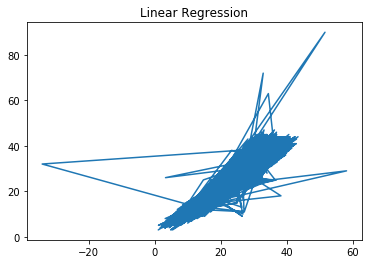

In [67]:
plt.plot(pred_lr,ytest)
plt.title('Linear Regression')
plt.show()

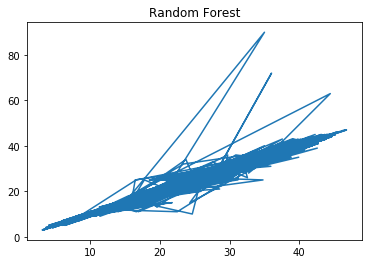

In [68]:
plt.plot(pred_rfr,ytest)
plt.title('Random Forest')
plt.show()

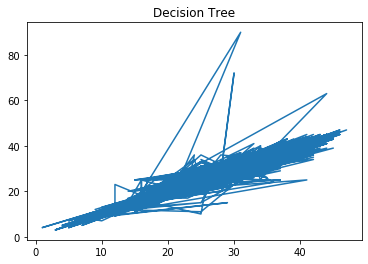

In [69]:
plt.plot(pred_dtr,ytest)
plt.title('Decision Tree')
plt.show()

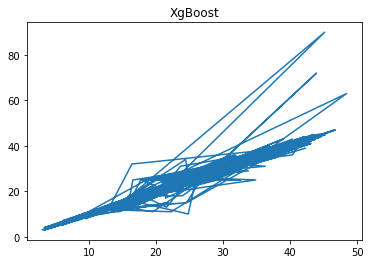

In [70]:
plt.plot(pred_xgr,ytest)
plt.title('XgBoost')
plt.show()

# Training on Neural Network

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [74]:
classifier=Sequential()

In [75]:
x.shape

(98913, 18)

In [76]:
classifier.add(Dense(output_dim=20, init='uniform', activation='relu',input_dim=18))
classifier.add(Dense(output_dim=25, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=15,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=15,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=15,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1,init= 'uniform'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [77]:
classifier.fit(xtrain,ytrain,batch_size=500,epochs=600)

Epoch 1/600
74184/74184 [==============================] - 1s 20us/step - loss: 500.1183
Epoch 2/600
74184/74184 [==============================] - 1s 11us/step - loss: 76.0407
Epoch 3/600
74184/74184 [==============================] - 1s 11us/step - loss: 46.9372
Epoch 4/600
74184/74184 [==============================] - 1s 11us/step - loss: 35.4487
Epoch 5/600
74184/74184 [==============================] - 1s 11us/step - loss: 21.4022
Epoch 6/600
74184/74184 [==============================] - 1s 11us/step - loss: 21.0810
Epoch 7/600
74184/74184 [==============================] - 1s 11us/step - loss: 15.4280
Epoch 8/600
74184/74184 [==============================] - 1s 11us/step - loss: 11.8292
Epoch 9/600
74184/74184 [==============================] - 1s 11us/step - loss: 9.0997
Epoch 10/600
74184/74184 [==============================] - 1s 11us/step - loss: 7.2448
Epoch 11/600
74184/74184 [==============================] - 1s 11us/step - loss: 5.6569
Epoch 12/600
74184/74184 [======

74184/74184 [==============================] - 1s 11us/step - loss: 0.9919
Epoch 95/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.9404
Epoch 96/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.8974
Epoch 97/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.8536
Epoch 98/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.8277
Epoch 99/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.7843
Epoch 100/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.7854
Epoch 101/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.7680
Epoch 102/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.7402
Epoch 103/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.7121
Epoch 104/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.7049
Epoch 105/600
74184/74184 [=============

74184/74184 [==============================] - 1s 12us/step - loss: 0.4130
Epoch 279/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.3822
Epoch 280/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.3937
Epoch 281/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.3987
Epoch 282/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.4013
Epoch 283/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3894
Epoch 284/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3977
Epoch 285/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3958
Epoch 286/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.4002
Epoch 287/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.4016
Epoch 288/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.4032
Epoch 289/600
74184/74184 [========

74184/74184 [==============================] - 1s 11us/step - loss: 0.3555
Epoch 463/600
74184/74184 [==============================] - 1s 12us/step - loss: 0.3544
Epoch 464/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3612
Epoch 465/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3683
Epoch 466/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3713
Epoch 467/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3569
Epoch 468/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3452
Epoch 469/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3587
Epoch 470/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3629
Epoch 471/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3522
Epoch 472/600
74184/74184 [==============================] - 1s 11us/step - loss: 0.3492
Epoch 473/600
74184/74184 [========

In [78]:
pred_deep=classifier.predict(xtest)

In [79]:
pred_deep=classifier.predict(xtest)
r2_deep=r2_score(pred_deep,ytest)
mse_deep=mean_squared_error(pred_deep,ytest)
print('r2 score is',r2_deep)
print('mse is', mse_deep)
print('rmse is',np.sqrt(mse_deep))

r2 score is 0.9925331849550819
mse is 0.5316922608840997
rmse is 0.7291723122034323


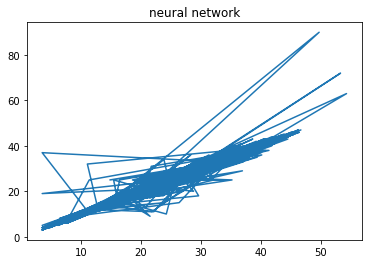

In [80]:
plt.plot(pred_deep,ytest)
plt.title('neural network')
plt.show()

# Best Model is XgBoost

# Saving the model using joblib.

In [86]:
from sklearn.externals import joblib


In [93]:
joblib.dump(xgr,'challenge_problem_1_model.pkl')

['challenge_problem_1_model.pkl']

In [98]:
model=joblib.load('challenge_problem_1_model.pkl')

[14:46:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
model.predict(xtest)

array([12.398113, 28.053715, 31.396185, ..., 32.490414, 13.156485,
       31.027933], dtype=float32)